# Group Project Exploratory Data Analysis
By Ashley Snell, Jeremy Taylor, Sydney Small

We are looking to explore the relationship between different party drugs and the relationship between using one and using an other. 
We are also going to look at personality scores and their impact on drug use.

In [1]:
import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as pltco
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [2]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1} #only counting people who used in last month as users.
druguser.Cannabis = druguser.Cannabis.map(names)
druguser.Semer = druguser.Semer.map(names)
druguser.Nicotine = druguser.Nicotine.map(names)
druguser.LSD = druguser.LSD.map(names)
druguser.Mushrooms = druguser.Mushrooms.map(names)
druguser.Ecstasy = druguser.Ecstasy.map(names)
druguser.Coke = druguser.Coke.map(names)
druguser.Alcohol = druguser.Alcohol.map(names)

[0.26966741 0.1913091  0.11649396 0.1143996  0.08491502]


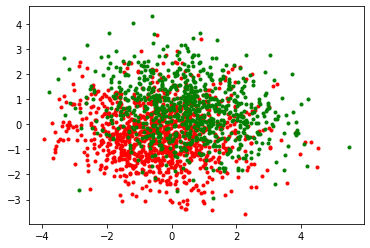

In [3]:
XX = np.array(druguser[['Cscore','Escore','Ascore','Nscore','Impulsive','Oscore','Age','Gender','Education']])
y = np.array(druguser['Cannabis'])
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
XXpca = pca.fit_transform(XX);
plt.plot(XXpca[y==0, 0], XXpca[y==0, 1], 'r.')
plt.plot(XXpca[y==1, 0], XXpca[y==1, 1], 'g.');
print(pca.explained_variance_ratio_)

In [4]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

In [5]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 0.25, X_train[:, 0].max() + 0.25
    y_min, y_max = X_train[:, 1].min() - 0.25, 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

Training Error: 0.7287798408488063
Testing Error: 0.7241379310344828


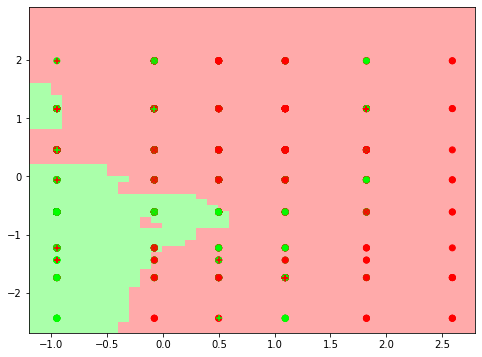

In [6]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

In [7]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Nicotine']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

Training Error: 0.6339522546419099
Testing Error: 0.6578249336870027


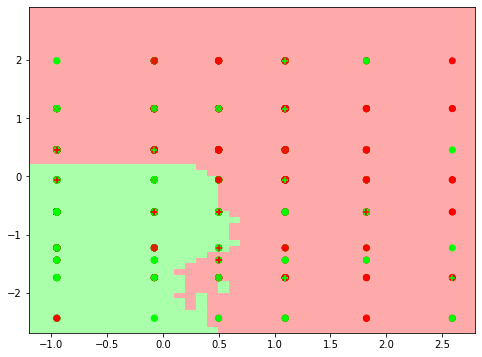

In [8]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

In [23]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Alcohol']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]


clf = KNeighborsClassifier(n_neighbors=100) # Define the model
clf.fit(X_train, y_train); # Train the model

Training Error: 0.8249336870026526
Testing Error: 0.8143236074270557


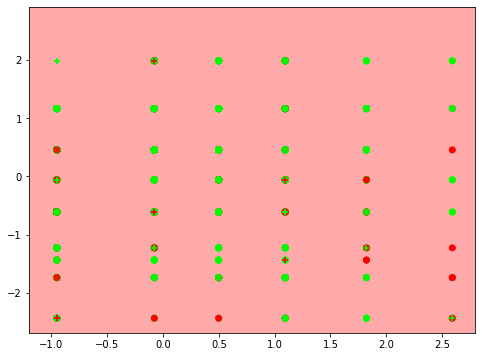

In [24]:
plot_cat_model(clf, X_train, y_train, X_test, y_test)

## This is not a good model for alcohol use most likley because the use of alcohol is widespread throughout age and education. 

# Quadratic Discriminant Analysis 

In [30]:
X = np.array(druguser[['Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

In [31]:
mu_0 = X[y==0].mean()
mu_1 = X[y==1].mean()
mu_0, mu_1

(0.2172289972652689, -0.31151610406091373)

In [32]:
mu = X.mean()
sigma2 = np.mean((X-mu)**2)
sigma2

0.9021698257898592

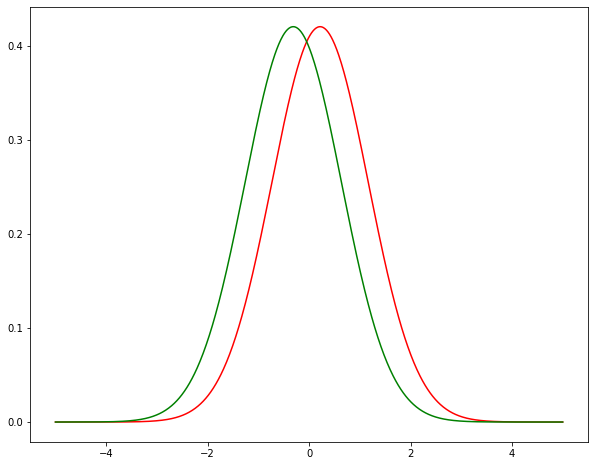

In [43]:
xx = np.linspace(-5, 5, 1000)

p0 = 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(xx-mu_0)**2/(2*sigma2))
p1 = 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(xx-mu_1)**2/(2*sigma2))

plt.figure(figsize=(10,8))
plt.plot(xx, p0, 'r-')
plt.plot(xx, p1, 'g-');

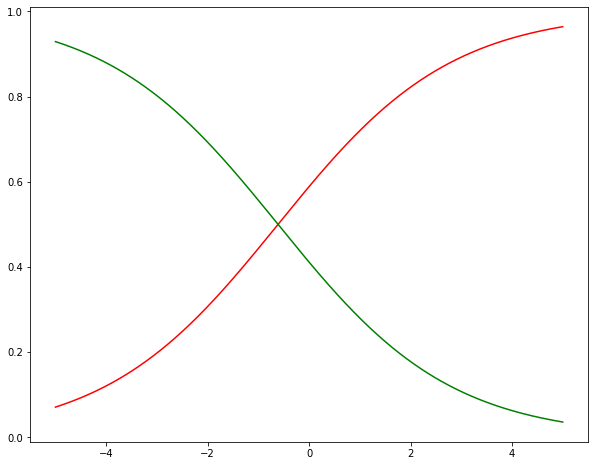

In [44]:
y1 = sum(y)/y.shape[0]
y0 = 1 - y1

q0 = p0*y0 / (p0*y0 + p1*y1)
q1 = p1*y1 / (p0*y0 + p1*y1)

plt.figure(figsize=(10,8))
plt.plot(xx, q0, 'r-')
plt.plot(xx, q1, 'g-')

In [45]:
sigma2_0 = np.mean((X[y==0]-mu_0)**2)
sigma2_1 = np.mean((X[y==1]-mu_1)**2)
sigma2_0, sigma2_1

(0.9242365471483107, 0.7087498748341872)

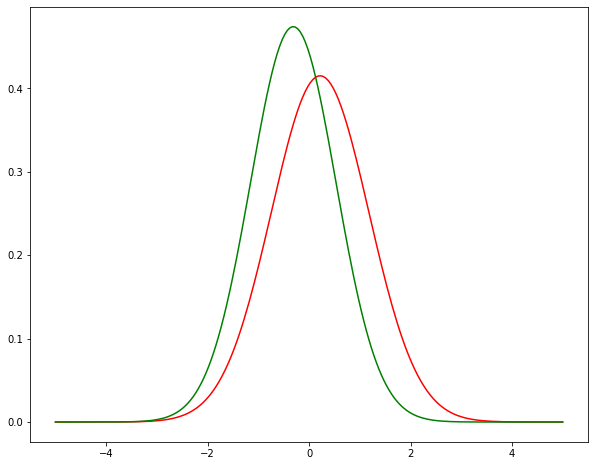

In [47]:
xx = np.linspace(-5, 5, 200)

p0 = 1/np.sqrt(2*np.pi*sigma2_0)*np.exp(-(xx-mu_0)**2/(2*sigma2_0))
p1 = 1/np.sqrt(2*np.pi*sigma2_1)*np.exp(-(xx-mu_1)**2/(2*sigma2_1))

plt.figure(figsize=(10,8))
plt.plot(xx, p0, 'r-')
plt.plot(xx, p1, 'g-')

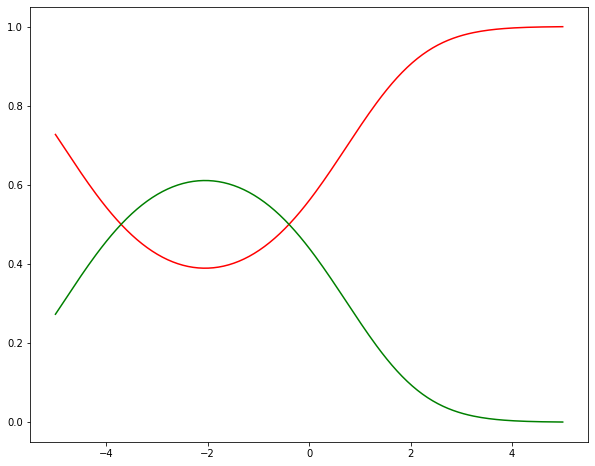

In [48]:
y1 = sum(y)/y.shape[0]
y0 = 1 - y1

q0 = p0*y0 / (p0*y0 + p1*y1)
q1 = p1*y1 / (p0*y0 + p1*y1)

plt.figure(figsize=(10,8))
plt.plot(xx, q0, 'r-')
plt.plot(xx, q1, 'g-')

In [49]:
s = abs(q1 - q0)
A, B = np.partition(s, 1)[:2]  

d1, d2 = np.where(s==A), np.where(s==B)

xx[d1], xx[d2]

(array([-3.69346734]), array([-0.37688442]))

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [55]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [56]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training Error: 0.7407161803713528
Testing Error: 0.7108753315649867


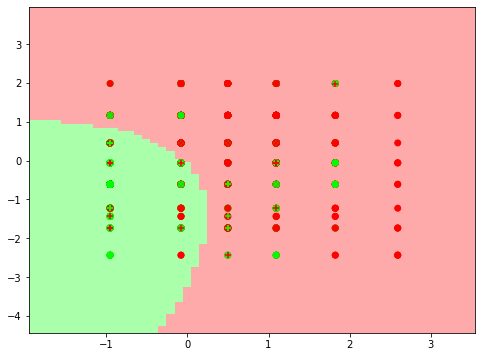

In [57]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)